逻辑回归本名应该叫对数几率回归，是线性回归的一种推广，所以我们在统计学上也称之为广义线性模型

相较于线性回归的因变量 y 为连续值，逻辑回归的因变量则是一个 0/1 的二分类值，这就需要我们建立一种映射将原先的实值转化为 0/1 值。这时候就要请出我们熟悉的 sigmoid 函数了：

![title](640.webp)

![title](641.webp)

## 极大似然估计

https://zhuanlan.zhihu.com/p/26614750

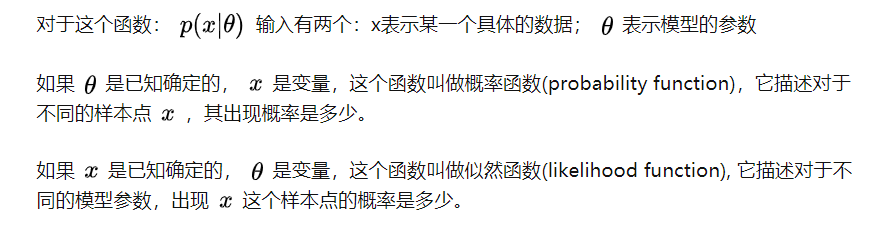

假如有一个罐子，里面有黑白两种颜色的球，数目多少不知，两种颜色的比例也不知。我 们想知道罐中白球和黑球的比例，但我们不能把罐中的球全部拿出来数。现在我们可以每次任意从已经摇匀的罐中拿一个球出来，记录球的颜色，然后把拿出来的球 再放回罐中。这个过程可以重复，我们可以用记录的球的颜色来估计罐中黑白球的比例。假如在前面的一百次重复记录中，有七十次是白球，请问罐中白球所占的比例最有可能是多少？

**很多人马上就有答案了：70%。**而其后的理论支撑是什么呢？

**现在我们根据这100次记录推算p，即比例，按理说p可以为任何值，因为是概率问题，任何值都有可能出现这100次记录的结果，但是，我们想要这100次结果出现的概率最大，所以可以看成想要使p的函数p^70(1-p)^30最大，取对数求导为0得到p=0.7。**

![title](644.webp)

![title](642.webp)

这里是**后验概率**，即y为0或者1时x的概率。x就是模型参数，y为我们观测到的结果，即训练数据。

![title](640.png)

W和b可以看作概率模型参数，取对数求导为0找到使**实验数据出现概率最大**的W,，b值

![title](643.webp)

In [17]:
import numpy as np
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))    
    return z

In [18]:
def initialize_params(dims):
    W = np.zeros((dims, 1))
    b = 0
    return W, b

In [20]:
def logistic(X, y, W, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]

    a = sigmoid(np.dot(X, W) + b)
    cost = -1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a))

    dW = np.dot(X.T, (a-y))/num_train #就是上面的图片，y_hat就是a
    db = np.sum(a-y)/num_train
    cost = np.squeeze(cost) 

    return a, cost, dW, db

In [21]:
def logistic_train(X, y, learning_rate, epochs):    
    # 初始化模型参数
    W, b = initialize_params(X.shape[1])  
    cost_list = []  

    # 迭代训练
    for i in range(epochs):       
        # 计算当前次的模型计算结果、损失和参数梯度
        a, cost, dW, db = logistic(X, y, W, b)    
        # 参数更新
        W = W -learning_rate * dW
        b = b -learning_rate * db        

        # 记录损失
        if i % 100 == 0:
            cost_list.append(cost)   
        # 打印训练过程中的损失 
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, cost)) 

    # 保存参数
    params = {            
        'W': W,            
        'b': b
    }        
    # 保存梯度
    grads = {            
        'dW': dW,            
        'db': db
    }           
    return cost_list, params, grads

In [22]:
def predict(X, params):
    y_prediction = sigmoid(np.dot(X, params['W']) + params['b']) 
    for i in range(len(y_prediction)):        
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
    return y_prediction

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


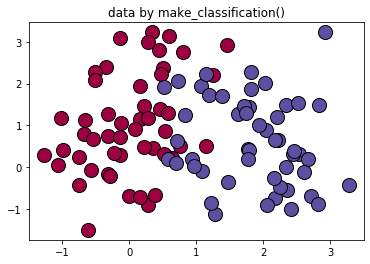

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification
X,labels=make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)

unique_lables=set(labels)
colors=plt.cm.Spectral(np.linspace(0, 1, len(unique_lables)))
for k, col in zip(unique_lables, colors):
    x_k=X[labels==k]
    plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor="k",
             markersize=14)
plt.title('data by make_classification()')
plt.show()

In [24]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [26]:
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 1000)

epoch 0 cost 0.693147
epoch 100 cost 0.554066
epoch 200 cost 0.480953
epoch 300 cost 0.434738
epoch 400 cost 0.402395
epoch 500 cost 0.378275
epoch 600 cost 0.359468
epoch 700 cost 0.344313
epoch 800 cost 0.331783
epoch 900 cost 0.321216


In [27]:
y_prediction = predict(X_test, params)
print(y_prediction)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [29]:
def accuracy(y_test, y_pred):
    correct_count = 0
    for i in range(len(y_test)):        
        for j in range(len(y_pred)):            
            if y_test[i] == y_pred[j] and i == j:
                correct_count +=1

    accuracy_score = correct_count / len(y_test)    
    return accuracy_score
    
accuracy_score_test = accuracy(y_test, y_prediction)
print(accuracy_score_test)

1.0
